In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [3]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "../00_ML_data/01_Accel_Data_m_s/"

In [4]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 6 입니다 '

In [5]:
data_list = os.listdir(PATH)
data_list

['Accel_2012',
 'Accel_2013',
 'Accel_2014',
 'Accel_2015',
 'Accel_2017',
 'Accel_2018']

In [6]:
dataNumber = [] 
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    dataNumber.append(len(dataList))
                    
print(sum(dataNumber))

21514


In [7]:
path = '../00_ML_data/01_Accel_Data_m_s/Accel_2012/3332325_0.dat'
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
signals = data_df.copy()
signals = signals.drop('time',axis=1)
fs = 200
x = signal.resample(signals['_x'][0:7200],72000)

In [8]:
# print(len(x))
print(signals['_x'][0:7200])

0      -3.197749e-08
1       2.591352e-08
2      -2.678963e-09
3       5.040576e-09
4      -7.528876e-09
            ...     
7195    8.888112e-08
7196   -3.280977e-08
7197   -1.460355e-08
7198    6.170732e-08
7199   -3.664908e-08
Name: _x, Length: 7200, dtype: float64


In [9]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 12,
                              nfft = 256)
Sxx.shape

(129, 295)

<function matplotlib.pyplot.show(*args, **kw)>

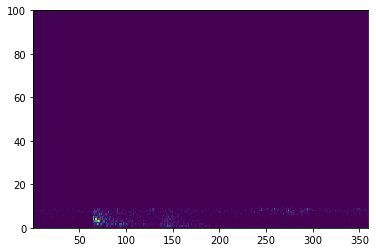

In [10]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 12)
plt.pcolormesh(t, f, Sxx)
plt.show

In [11]:
Sxx.shape

(129, 295)

In [12]:
Sxx.shape[1]

295

In [13]:
 FrequencyArray = Sxx[:,0]
len(FrequencyArray)

129

In [14]:
FrequencyArray

array([5.15068340e-20, 2.37856334e-18, 2.60692461e-18, 1.43524333e-17,
       1.15453178e-17, 1.13147646e-18, 5.31141422e-18, 4.95431147e-17,
       5.69103818e-17, 1.18137559e-16, 1.23902605e-16, 1.21986003e-16,
       6.99271737e-19, 6.25960341e-18, 2.91886271e-18, 1.34608732e-18,
       5.21508636e-19, 1.55273336e-19, 3.38220243e-20, 7.85437258e-21,
       4.16623488e-21, 1.95918630e-21, 3.83600292e-22, 2.18184943e-22,
       5.08058555e-22, 4.70085786e-22, 2.22416645e-22, 7.24850217e-23,
       4.18770696e-23, 2.68966877e-23, 6.35939791e-24, 7.54297665e-24,
       2.24601561e-23, 2.46982307e-23, 1.33763701e-23, 4.46883942e-24,
       2.76238961e-24, 2.16140635e-24, 5.67942592e-25, 7.97636083e-25,
       2.72089865e-24, 3.28303329e-24, 1.89051694e-24, 6.13342796e-25,
       3.90814451e-25, 3.61795757e-25, 1.08598080e-25, 1.49780868e-25,
       5.50507476e-25, 7.05951847e-25, 4.22150846e-25, 1.31605001e-25,
       8.45285800e-26, 9.06173952e-26, 3.12910796e-26, 4.01100491e-26,
      

In [15]:
TimeArray = Sxx[0]
len(TimeArray)

295

# STFT 데이터 분석

In [16]:
# for i in range(0,6):
#     dataList = os.listdir(PATH + data_list[i])
#     for j in range(0,len(dataList)):

In [17]:
dataName = []
dataLength = []
TimeFrequencyArray = []

In [18]:
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    #print(len(dataList))
    for j in range(0,len(dataList)):
    #for j in range(0,len(dataList)):
        path = PATH + data_list[i] + "/" + dataList[j]
        #print(path)
        data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
        
        signals = data_df.copy()
        signals = signals.drop('time',axis=1)
        #print(signals.head(5))
        
        fs = 200
        #x =  signals['_x'][0:7200]
        x = signal.resample(signals['_x'][0:7200], 72000)
        #print(len(x))
        #x = x * pow(10,10) # 일정값 곱하기 
        
        #len_x = len(signals['_x'])
        f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 64,
                              noverlap = 32)
        #print(Sxx.shape)
        FrequencyArray = Sxx[:,0]
        for k in range(1, Sxx.shape[1]):
            FrequencyArray += Sxx[:,k]  
        
#         FrequencyArray = FrequencyArray.reshape(-1,1)
#         scaler.fit(FrequencyArray)
#         FrequencyArray = scaler.transform(FrequencyArray)
   

        TimeArray = Sxx[0]
        for k in range(1, Sxx.shape[0]):
            TimeArray += Sxx[k]
        
#         TimeArray = TimeArray.reshape(-1,1)
#         scaler.fit(TimeArray)
#         TimeArray = scaler.transform(TimeArray)
        
        
        TFA = np.concatenate((TimeArray,FrequencyArray))
        #print(TimeFrequencyArray)
        #print(TimeArray.shape)
        #print(FrequencyArray.shape)
        
        dataName.append(dataList[j])
        dataLength.append(len(data_df['_x']))
        TimeFrequencyArray.append(TFA)
       

In [19]:
len(x)

72000

In [20]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 128)

In [21]:
Sxx.shape

(129, 561)

<function matplotlib.pyplot.show(*args, **kw)>

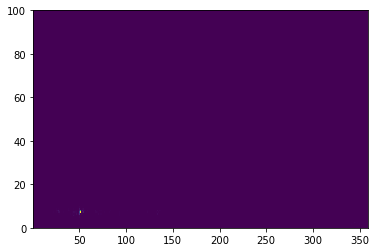

In [22]:
plt.pcolormesh(t, f, Sxx)
plt.show

In [23]:
#print(dataName)
# print(dataLength)
#print(TimeFrequencyArray)

In [24]:
NPTimeFrequencyArray= np.array(TimeFrequencyArray)
NPTimeFrequencyArray

array([[1.73960725e-12, 2.75418882e-17, 2.25646823e-17, ...,
        1.93146169e-21, 2.61585816e-21, 1.26605709e-21],
       [1.26240380e-12, 2.34075661e-17, 9.03014037e-18, ...,
        1.39158065e-21, 1.90733714e-21, 9.24412579e-22],
       [7.87787508e-13, 2.16884069e-17, 6.94127511e-18, ...,
        8.70779247e-22, 1.20010175e-21, 5.77735672e-22],
       ...,
       [6.64063666e-16, 6.34074930e-20, 1.85324330e-19, ...,
        3.55873454e-25, 6.91957412e-25, 3.50335023e-25],
       [7.07986288e-16, 3.46412635e-20, 1.18173283e-19, ...,
        3.67567403e-25, 6.69293548e-25, 3.13465893e-25],
       [8.23117808e-16, 1.83714335e-20, 5.65317551e-20, ...,
        3.96124102e-25, 7.10229574e-25, 3.15786180e-25]])

In [25]:
NPTimeFrequencyArray.shape

(21514, 2282)

# dataFrame 넣기 

In [26]:
df = pd.DataFrame(NPTimeFrequencyArray)
df.shape

(21514, 2282)

In [27]:
len(dataName)

21514

In [28]:
#df['dataName'] = [name.replace('.dat','') for name in dataName]
df['dataLength'] = dataLength

In [29]:
print(df.shape)
df.head(5)

(21514, 2283)


,0,1,2,3,4,5,6,7,8,9,...,2273,2274,2275,2276,2277,2278,2279,2280,2281,dataLength
0,1.739607e-12,2.754189e-17,2.256468e-17,1.986654e-16,3.668467e-16,1.445134e-16,8.280009e-17,3.953196e-16,2.889824e-16,9.984988e-17,...,1.621931e-19,1.348250e-19,9.794237e-20,5.733978e-20,2.236358e-20,4.719832e-21,1.931462e-21,2.615858e-21,1.266057e-21,8598
1,1.262404e-12,2.340757e-17,9.030140e-18,1.309232e-16,2.486531e-16,9.464444e-17,4.065759e-17,2.757420e-16,2.205980e-16,7.375701e-17,...,1.159722e-19,9.664079e-20,7.065513e-20,4.172243e-20,1.637820e-20,3.443436e-21,1.391581e-21,1.907337e-21,9.244126e-22,8598
2,7.877875e-13,2.168841e-17,6.941275e-18,7.111981e-17,1.312257e-16,4.947895e-17,1.479524e-17,1.552723e-16,1.383433e-16,4.550813e-17,...,7.230000e-20,5.965755e-20,4.337624e-20,2.576480e-20,1.021168e-20,2.149705e-21,8.707792e-22,1.200102e-21,5.777357e-22,8598
3,4.429314e-13,2.284506e-17,1.685780e-17,3.527967e-17,4.602902e-17,2.111905e-17,1.214284e-17,6.619024e-17,6.425835e-17,2.267249e-17,...,4.287835e-20,3.378486e-20,2.341505e-20,1.374272e-20,5.516322e-21,1.185292e-21,5.086058e-22,6.836551e-22,3.189182e-22,8598
4,3.202395e-13,2.656760e-17,3.612258e-17,3.300605e-17,1.589148e-17,1.716374e-17,3.341110e-17,3.236535e-17,1.819416e-17,1.136890e-17,...,3.559080e-20,2.595529e-20,1.612015e-20,8.877512e-21,3.550248e-21,8.086120e-22,4.021044e-22,4.963788e-22,2.173100e-22,8598


# 데이터 뽑기 

In [30]:
df.to_csv('NPTimeFrequencyArray.csv',index=False)

In [31]:
ydata = pd.read_csv('./02_Code_ver2/01_y_data_total.csv')
#ydata = ydata[:180]
ydata

,fileName,path1_membrane_SINT,path1_bending_SINT,path2_membrane_SINT,path2_bending_SINT,path3_membrane_SINT,path3_bending_SINT,path4_membrane_SINT,path4_bending_SINT,path5_membrane_SINT,...,path10_membrane_SINT,path10_bending_SINT,path11_membrane_SINT,path11_bending_SINT,path12_membrane_SINT,path12_bending_SINT,path13_membrane_SINT,path13_bending_SINT,path14_membrane_SINT,path14_bending_SINT
0,3332325_0,4.210000e-06,1.550000e-06,6.250000e-06,6.960000e-07,3.980000e-06,1.540000e-06,1.040000e-06,1.240000e-07,0.000033,...,1.260000e-05,7.920000e-07,6.460000e-06,2.260000e-06,5.510000e-06,4.810000e-06,1.440000e-05,1.610000e-05,1.090000e-05,1.070000e-05
1,3332325_15,3.800000e-06,1.410000e-06,5.590000e-06,6.300000e-07,3.570000e-06,1.390000e-06,9.530000e-07,1.110000e-07,0.000029,...,1.120000e-05,7.030000e-07,5.780000e-06,2.030000e-06,4.960000e-06,4.330000e-06,1.300000e-05,1.440000e-05,9.850000e-06,9.630000e-06
2,3332325_30,3.280000e-06,1.220000e-06,4.830000e-06,5.390000e-07,3.080000e-06,1.190000e-06,8.230000e-07,9.400000e-08,0.000025,...,9.610000e-06,5.930000e-07,4.970000e-06,1.740000e-06,4.280000e-06,3.740000e-06,1.120000e-05,1.250000e-05,8.500000e-06,8.330000e-06
3,3332325_45,2.550000e-06,9.540000e-07,3.780000e-06,4.230000e-07,2.410000e-06,9.320000e-07,6.430000e-07,7.390000e-08,0.000020,...,7.490000e-06,4.550000e-07,3.880000e-06,1.360000e-06,3.330000e-06,2.910000e-06,8.730000e-06,9.720000e-06,6.630000e-06,6.470000e-06
4,3332325_60,2.180000e-06,8.090000e-07,3.220000e-06,3.550000e-07,2.050000e-06,7.890000e-07,5.430000e-07,6.220000e-08,0.000017,...,6.410000e-06,3.950000e-07,3.310000e-06,1.160000e-06,2.850000e-06,2.490000e-06,7.460000e-06,8.310000e-06,5.660000e-06,5.550000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21509,10723805_30_sigma_1,1.850000e-07,6.800000e-08,2.890000e-07,2.860000e-08,1.780000e-07,6.200000e-08,4.250000e-08,4.920000e-09,0.000002,...,5.750000e-07,3.050000e-08,2.980000e-07,1.050000e-07,2.360000e-07,1.910000e-07,6.190000e-07,6.730000e-07,4.670000e-07,4.130000e-07
21510,10723805_45_sigma_1,1.500000e-07,5.490000e-08,2.340000e-07,2.310000e-08,1.440000e-07,5.010000e-08,3.430000e-08,3.980000e-09,0.000001,...,4.680000e-07,2.480000e-08,2.420000e-07,8.470000e-08,1.910000e-07,1.550000e-07,5.010000e-07,5.450000e-07,3.780000e-07,3.350000e-07
21511,10723805_60_sigma_1,1.650000e-07,5.960000e-08,2.550000e-07,2.480000e-08,1.570000e-07,5.320000e-08,3.640000e-08,4.240000e-09,0.000001,...,5.230000e-07,2.740000e-08,2.680000e-07,9.390000e-08,2.050000e-07,1.590000e-07,5.360000e-07,5.760000e-07,4.060000e-07,3.390000e-07
21512,10723805_75_sigma_1,1.950000e-07,7.100000e-08,3.040000e-07,2.990000e-08,1.870000e-07,6.380000e-08,4.360000e-08,5.120000e-09,0.000002,...,6.190000e-07,3.230000e-08,3.180000e-07,1.120000e-07,2.440000e-07,1.910000e-07,6.400000e-07,6.890000e-07,4.850000e-07,4.070000e-07


In [32]:
# frames = [df, ydata]

In [33]:
# dfMerge = pd.concat(frames, axis = 1)
# dfMerge

In [34]:
# dfMerge.drop(['fileName','dataName'],axis=1)

In [35]:
for i in range(1,15):
    frames = [df, ydata['path'+str(i)+'_membrane_SINT'],ydata['path'+str(i)+'_bending_SINT']]
    test = pd.concat(frames, axis = 1)
    test.to_csv('path'+str(i)+'Data.csv',index=False)
    print(test.head(5))

              0             1             2             3             4  \
0  1.739607e-12  2.754189e-17  2.256468e-17  1.986654e-16  3.668467e-16   
1  1.262404e-12  2.340757e-17  9.030140e-18  1.309232e-16  2.486531e-16   
2  7.877875e-13  2.168841e-17  6.941275e-18  7.111981e-17  1.312257e-16   
3  4.429314e-13  2.284506e-17  1.685780e-17  3.527967e-17  4.602902e-17   
4  3.202395e-13  2.656760e-17  3.612258e-17  3.300605e-17  1.589148e-17   

              5             6             7             8             9  ...  \
0  1.445134e-16  8.280009e-17  3.953196e-16  2.889824e-16  9.984988e-17  ...   
1  9.464444e-17  4.065759e-17  2.757420e-16  2.205980e-16  7.375701e-17  ...   
2  4.947895e-17  1.479524e-17  1.552723e-16  1.383433e-16  4.550813e-17  ...   
3  2.111905e-17  1.214284e-17  6.619024e-17  6.425835e-17  2.267249e-17  ...   
4  1.716374e-17  3.341110e-17  3.236535e-17  1.819416e-17  1.136890e-17  ...   

           2275          2276          2277          2278          2

              0             1             2             3             4  \
0  1.739607e-12  2.754189e-17  2.256468e-17  1.986654e-16  3.668467e-16   
1  1.262404e-12  2.340757e-17  9.030140e-18  1.309232e-16  2.486531e-16   
2  7.877875e-13  2.168841e-17  6.941275e-18  7.111981e-17  1.312257e-16   
3  4.429314e-13  2.284506e-17  1.685780e-17  3.527967e-17  4.602902e-17   
4  3.202395e-13  2.656760e-17  3.612258e-17  3.300605e-17  1.589148e-17   

              5             6             7             8             9  ...  \
0  1.445134e-16  8.280009e-17  3.953196e-16  2.889824e-16  9.984988e-17  ...   
1  9.464444e-17  4.065759e-17  2.757420e-16  2.205980e-16  7.375701e-17  ...   
2  4.947895e-17  1.479524e-17  1.552723e-16  1.383433e-16  4.550813e-17  ...   
3  2.111905e-17  1.214284e-17  6.619024e-17  6.425835e-17  2.267249e-17  ...   
4  1.716374e-17  3.341110e-17  3.236535e-17  1.819416e-17  1.136890e-17  ...   

           2275          2276          2277          2278          2

              0             1             2             3             4  \
0  1.739607e-12  2.754189e-17  2.256468e-17  1.986654e-16  3.668467e-16   
1  1.262404e-12  2.340757e-17  9.030140e-18  1.309232e-16  2.486531e-16   
2  7.877875e-13  2.168841e-17  6.941275e-18  7.111981e-17  1.312257e-16   
3  4.429314e-13  2.284506e-17  1.685780e-17  3.527967e-17  4.602902e-17   
4  3.202395e-13  2.656760e-17  3.612258e-17  3.300605e-17  1.589148e-17   

              5             6             7             8             9  ...  \
0  1.445134e-16  8.280009e-17  3.953196e-16  2.889824e-16  9.984988e-17  ...   
1  9.464444e-17  4.065759e-17  2.757420e-16  2.205980e-16  7.375701e-17  ...   
2  4.947895e-17  1.479524e-17  1.552723e-16  1.383433e-16  4.550813e-17  ...   
3  2.111905e-17  1.214284e-17  6.619024e-17  6.425835e-17  2.267249e-17  ...   
4  1.716374e-17  3.341110e-17  3.236535e-17  1.819416e-17  1.136890e-17  ...   

           2275          2276          2277          2278          2